In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import scipy

In [12]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
from sklearn.svm import SVC

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.metrics import recall_score

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.model_selection import cross_validate

In [11]:
wifi = pd.read_csv('trainingData.csv', header =0)

In [33]:
wifi.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [34]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [35]:
wifi.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [12]:
wifi.drop(['LONGITUDE','LATITUDE','USERID','TIMESTAMP', 'PHONEID'], axis=1, inplace=True)

In [19]:
wifi.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,106,2
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,2,1,103,2
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,2,1,102,2
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,0,0,122,2


In [13]:
wifi['ID'] = wifi['FLOOR'].map(str)+wifi['BUILDINGID'].map(str)+wifi['SPACEID'].map(str)+wifi['RELATIVEPOSITION'].map(str)

In [21]:
wifi.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP516,WAP517,WAP518,WAP519,WAP520,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,ID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,2,1,106,2,211062
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,2,1,106,2,211062
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,2,1,103,2,211032
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,2,1,102,2,211022
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,0,0,122,2,001222


In [14]:
wifi.drop(['FLOOR','BUILDINGID','SPACEID','RELATIVEPOSITION'], axis=1, inplace=True)

In [14]:
wifi.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520,ID
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,211062
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,211062
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,211032
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,211022
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,001222


In [49]:
wifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 521 entries, WAP001 to ID
dtypes: int64(520), object(1)
memory usage: 79.2+ MB


In [15]:
features= wifi. iloc[:, 0:520]

In [16]:
features.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [17]:
depVar = wifi['ID']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.3)

In [54]:
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
3978,100,100,100,100,100,-95,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3876,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
86,100,100,100,100,100,100,100,100,100,100,...,-98,100,100,100,100,100,100,100,100,100
16160,100,100,100,100,100,100,100,100,-83,100,...,100,100,100,100,100,100,100,100,100,100
11256,100,100,100,100,100,100,-97,100,100,100,...,100,100,100,100,100,100,100,100,100,100


Train the model

In [55]:
k_range=range(1,31)

In [56]:
k_scores=[]

In [57]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The

In [58]:
import matplotlib.pyplot as plt

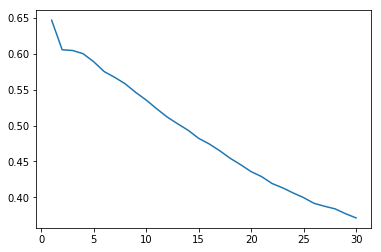

In [59]:
plt.plot(k_range, k_scores)

In [4]:
knnfit=KNeighborsClassifier(n_neighbors=2)

In [27]:
knnscores=cross_val_score(knnfit, X_train, y_train, cv=10, scoring='accuracy')

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [28]:
print(knnscores.mean())

0.6145477413080764


In [29]:
svc = SVC()

In [31]:
param_grid = {'C': [0.1, 1, 10, 100]}

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid_search = GridSearchCV(svc, param_grid, n_jobs = 1, verbose=10)

In [34]:
grid_search.fit(X_train, y_train)

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1 ...........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.1, score=0.012732417138237672, total=13.6min
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 31.7min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.1, score=0.007730298475413356, total=13.5min
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 63.4min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=0.1, score=0.009195402298850575, total=14.2min
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 98.8min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................... C=1, score=0.15642683912691996, total=13.3min
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 128.9min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................... C=1, score=0.1543912389950612, total=13.3min
[CV] C=1 .............................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 159.3min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................... C=1, score=0.16551724137931034, total=11.4min
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 186.5min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 253.4min remaining:    0.0s


[CV] .................. C=10, score=0.17663702506063056, total=51.4min
[CV] C=10 ............................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=10, score=0.18166201417221386, total=12.1min
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 281.9min remaining:    0.0s
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................... C=10, score=0.1889655172413793, total=12.3min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 311.5min remaining:    0.0s


[CV] C=100 ...........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................. C=100, score=0.17704122877930478, total=55.7min
[CV] C=100 ...........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ................ C=100, score=0.18144728365900795, total=658.4min
[CV] C=100 ...........................................................


C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................. C=100, score=0.1896551724137931, total=15.9min


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 1098.3min finished
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=10)

In [35]:
best_parameters = grid_search.best_estimator_.get_params()    
for para, val in list(best_parameters.items()):    
    print(para, val)

C 100
cache_size 200
class_weight None
coef0 0.0
decision_function_shape ovr
degree 3
gamma auto_deprecated
kernel rbf
max_iter -1
probability False
random_state None
shrinking True
tol 0.001
verbose False


In [36]:
svcfit = SVC(C=best_parameters['C'])

In [37]:
svcfit.fit(X_train, y_train)

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
scoressvc=cross_val_score(svcfit, X_train, y_train, cv=10, scoring='accuracy')

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gam

In [39]:
print(scoressvc.mean())

0.21269077246554252


In [40]:
param={'n_estimators':range(10,51,10)}

In [44]:
gsearch1= GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                 min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10),
                       param_grid =param,cv=10)

In [45]:
gsearch1.fit(X_train,y_train)

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 51, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 50}, 0.22859190254389108)

In [19]:
rffit=RandomForestClassifier(n_estimators=50)

In [20]:
rffit.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
scoresrf=cross_val_score(rffit, X_train, y_train, cv=10, scoring='accuracy')

C:\Users\miche\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [22]:
print(scoresrf.mean())

0.7801593703170931


In [23]:
predictions = rffit.predict(X_test)

In [24]:
predaccuracy = accuracy_score(y_test,predictions)

In [25]:
predaccuracy

0.7868605817452357

In [26]:
importances = rffit.feature_importances_

In [27]:
indices = np.argsort(importances)[::-1]

In [29]:
feat_labels = wifi.columns[1:]

In [30]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) WAP249                         0.012738
 2) WAP503                         0.010119
 3) WAP497                         0.009507
 4) WAP067                         0.009058
 5) WAP518                         0.008988
 6) WAP133                         0.008923
 7) WAP079                         0.008860
 8) WAP071                         0.008799
 9) WAP122                         0.008755
10) WAP063                         0.008754
11) WAP070                         0.008730
12) WAP088                         0.008714
13) WAP502                         0.008647
14) WAP066                         0.008588
15) WAP078                         0.008586
16) WAP123                         0.008576
17) WAP496                         0.008555
18) WAP132                         0.008545
19) WAP062                         0.008154
20) WAP013                         0.008120
21) WAP074                         0.008045
22) WAP119                         0.008025
23) WAP517                      

227) WAP165                         0.001278
228) WAP377                         0.001236
229) WAP401                         0.001233
230) WAP258                         0.001211
231) WAP339                         0.001201
232) WAP375                         0.001200
233) WAP317                         0.001196
234) WAP403                         0.001185
235) WAP316                         0.001181
236) WAP387                         0.001178
237) WAP395                         0.001149
238) WAP315                         0.001149
239) WAP256                         0.001146
240) WAP281                         0.001140
241) WAP373                         0.001098
242) WAP391                         0.001082
243) WAP261                         0.001071
244) WAP291                         0.001068
245) WAP419                         0.001054
246) WAP367                         0.001031
247) WAP370                         0.001020
248) WAP393                         0.001018
249) WAP26